# 1. What is a Perceptron

Perceptron is a mathematical model based on neurons in human nervous system. It is also an algorithm just like an SVM. They can be used for Supervised ML problems.

Perceptron is the building block of Deep Learning and Artificial Neural Networks.

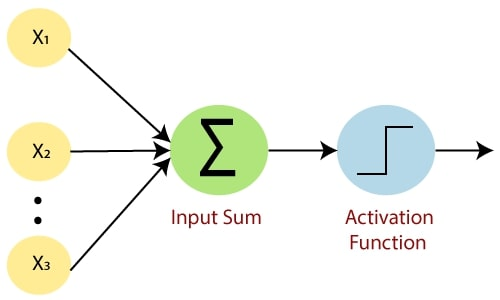

In [1]:
# Single-Layer Perceptron

from IPython import display
display.Image("data/images/DL_02_Perceptrons-01-Single-Layer-Perceptron.jpg")

Lets say, we want to solve a Supervised ML problem using Perceptron. We have two steps:
1. Training -> Find the optimum values (values that result in the lowest loss) for weights and bias
2. Prediction -> Use these optimum values on an unseen input and get prediction

**Note**

Feature importance can be determined by the values of weights. Prominent Features will have prominent weight values.

# 2. Neuron Vs Perceptron

Neuron is the building block of human nervous system whereas Perceptron is the building block of Deep Learning and Artificial Neural Networks. Perceptrons were created inspired by the biological neurons.

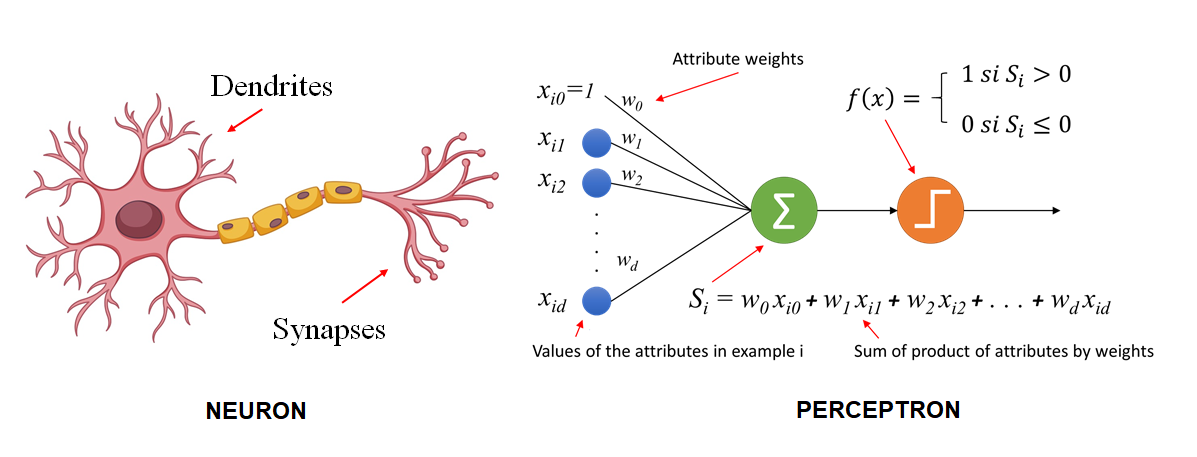

In [2]:
# Neuron Vs Perceptron

from IPython import display
display.Image("data/images/DL_02_Perceptrons-02-Neuron-Vs-Perceptron.png")

Neuron Vs Perceptron: Differences

1. Neurons are very complex while Perceptrons are relatively simple.
2. We don't know exactly what is happening inside a neuron's nucleus while we know what is happening inside a Perceptron (Summation followed by Activation)
3. Neurons have the property of Neuroplasticity (thickness of dendrites & synapses can increase or decrease based on strength of connection, old connections may get removed, new connections may get established). Connections inside Perceptrons can never change (once training is finished and parameters fixed).

# 3. Geometric Intuition of Perceptrons

Perceptron is a Binary Classifier. If we have two input features (2D), then Perceptron is nothing but a line used to separate two regions corresponding to two classes. If we have three input features (3D), then Perceptron is a plane used to separate two regions corresponding to two classes. If we have more than three input features (4D and above), then Perceptron is a hyperplane used to separate two regions corresponding to two classes.

**Note**

Perceptron has a limitation - it can classify only linear / sort of linear data (data that can be separated by line / plane / hyperplane). Perceptrons will fail if we have a completely non-linear dataset.

# 4. Perceptron Demo - Placement Classifier

We have a Placement dataset as a CSV file of 100 students with two features - cgpa and resume_score. We need to predict whether student got placed for a given cgpa and resume_score.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/datasets/DL_02_Perceptrons-placement.csv")
print(f"Shape of dataset: {df.shape}")
df.head()

Shape of dataset: (100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

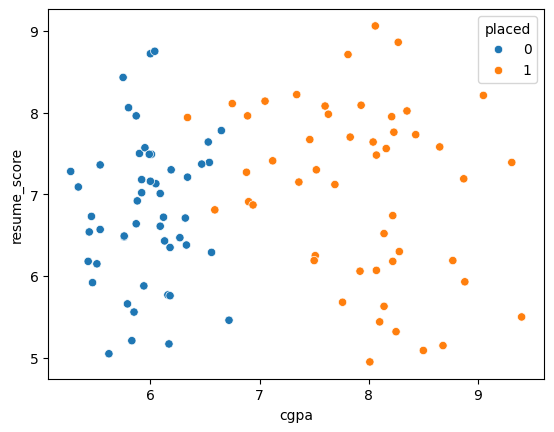

In [5]:
sns.scatterplot(x="cgpa", y="resume_score", hue="placed", data=df)

From above Scatter Plot, we can see that our dataset is linearly separable. Hence, Perceptrons can be used for Binary Classification.

In [6]:
# Extract X and y from dataset
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [7]:
# Create Perceptron model
from sklearn.linear_model import Perceptron
model = Perceptron()

In [8]:
# Train Perceptron model on dataset
model.fit(X, y)

Perceptron()

In [9]:
# Get weights (W1, W2)
model.coef_

array([[ 40.26, -36.  ]])

In [10]:
# Get bias b
model.intercept_

array([-25.])

<Axes: >

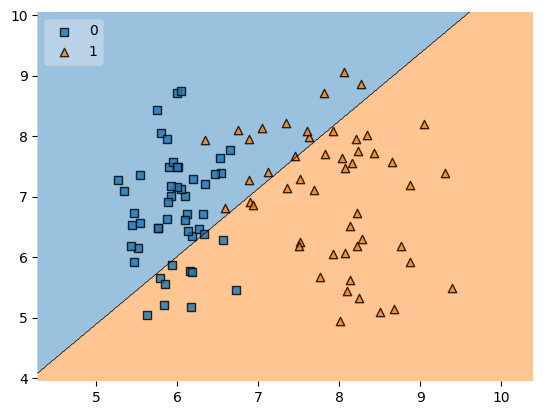

In [11]:
# Plot Decision Regions
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model, legend=2)

# 5. How to train a Perceptron | Perceptron Trick

We need to train a Perceptron such that it performs well i.e. we want to reach the best fit line. In Perceptron Trick, we start with a random line. We then choose random data points and check whether they are classified correctly. If misclassified, we transform that line such that it classifies this point correctly. We do this in a loop such that we arrive at the best fit line with a very good accuracy.

**Note**

We can run the loop either with a set number of iterations or till convergence (till number of misclassified points reaches a minimum value).

## Transformation of Lines

In order to shift line towards misclassified points, use below rules:

1. For negative point in Positive region
    - Take the line coefficients and subtract the misclassified point coordinate values from it.
    - Subtract 1 from the bias value.
2. For positive point in Negative region
    - Take the line coefficients and add the misclassified point coordinate values into it.
    - Add 1 to the bias value.

**Note**

In real scenario, we use a learning rate (typically 0.01). Misclassified point coordinates are multiplied with the learning rate before applying the transformation.

## Placement Classifier Problem: Mathematical Analysis

If we take the Placement Classifier problem, we have two features. Hence, our Perceptron will have two weights and a bias. If we represent bias b as $W_0$ and weights as $W_1$ and $W_2$, then Summation equation will become $\sum_{i=0}^{2} W_i X_i$ where $X_0$ is a matrix of ones.

If we are using a Step Activation function, then

$placed = \begin{cases}
    1 & \text{if } \sum_{i=0}^{2} W_i X_i \geq 0 \\
    0 & \text{if } \sum_{i=0}^{2} W_i X_i < 0
\end{cases}$




## Placement Classifier Problem: Algorithm for Perceptron Trick

Let $P$ and $N$ represent positive and negative regions of Perceptron best fit line.

Let $epochs = 1000, \eta = 0.01$

for $i$ in range($epochs$):

> randomly select a student data point $X_i = \begin{bmatrix} X_0 & X_1 & X_2 \end{bmatrix}$

> if $X_i \in N$ and $\sum_{i=0}^{2} W_i X_i \geq 0$, $W_{new} = W_{old} - \eta X_i$

> if $X_i \in P$ and $\sum_{i=0}^{2} W_i X_i < 0$, $W_{new} = W_{old} + \eta X_i$

**Note**

$X_i \in P \implies y_i = 1$

$X_i \in N \implies y_i = 0$

$\sum_{i=0}^{2} W_i X_i \geq 0 \implies \hat{y_i} = 1$

$\sum_{i=0}^{2} W_i X_i < 0 \implies \hat{y_i} = 0$

### Placement Classifier Problem: Simplified Algorithm for Perceptron Trick

for $i$ in range($epochs$):

> randomly select a student data point $X_i = \begin{bmatrix} X_0 & X_1 & X_2 \end{bmatrix}$

> $W_{new} = W_{old} + \eta (y_i - \hat{y_i}) X_i$

## Placement Classifier using Perceptron Trick

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Create Binary Classification Dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X: \n{X}")
print(f"y: \n{y}")

X shape: (100, 2)
y shape: (100,)
X: 
[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.

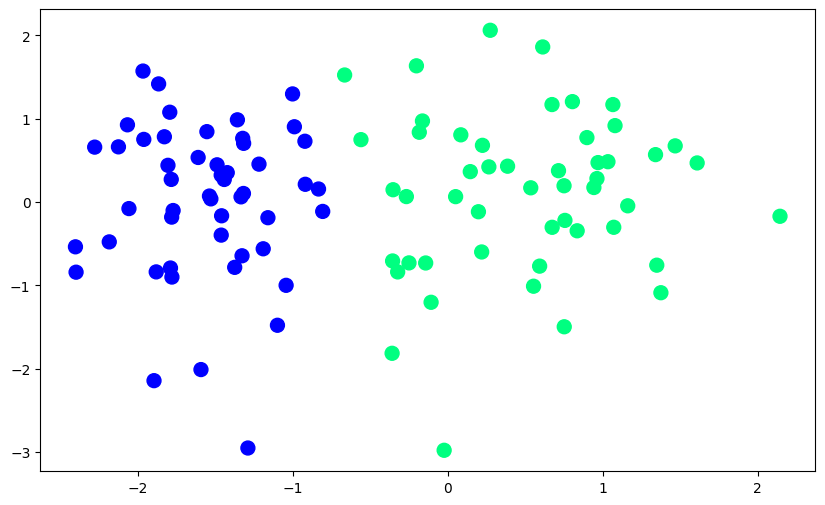

In [14]:
# Plot Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

From above Scatter Plot, we can see that our dataset is linearly separable. Hence, Perceptrons can be used for Binary Classification.

In [15]:
# Perceptron Model
def Perceptron(X, y, epochs=1000, lr=0.1):
  # Insert vector of ones to incorporate bias
  X = np.insert(X, 0, 1, axis=1)
  # Initialize weights as vector of ones
  weights = np.ones(X.shape[1])

  for _ in range(epochs):
    # Select a random student data point
    j = np.random.randint(0, X.shape[0])
    # Find prediction by Perceptron model
    y_hat = step(np.dot(X[j], weights))
    # Update weights
    weights = weights + lr * (y[j] - y_hat) * X[j]

  return weights[0], weights[1:]

def step(z):
  return 1 if z >= 0 else 0

In [16]:
# Get Perceptron parameters
intercept_, coef_ = Perceptron(X, y)
print(f"Intercept: {intercept_}")
print(f"Coefficients: {coef_}")

Intercept: 1.0
Coefficients: [1.25954431 0.12283035]


**Note**

Transforming line $Ax+By+C = 0$ to $y = mx + c$ format

$m = -(A/B)$ and $c = -(C/B)$

(-3.0, 3.0)

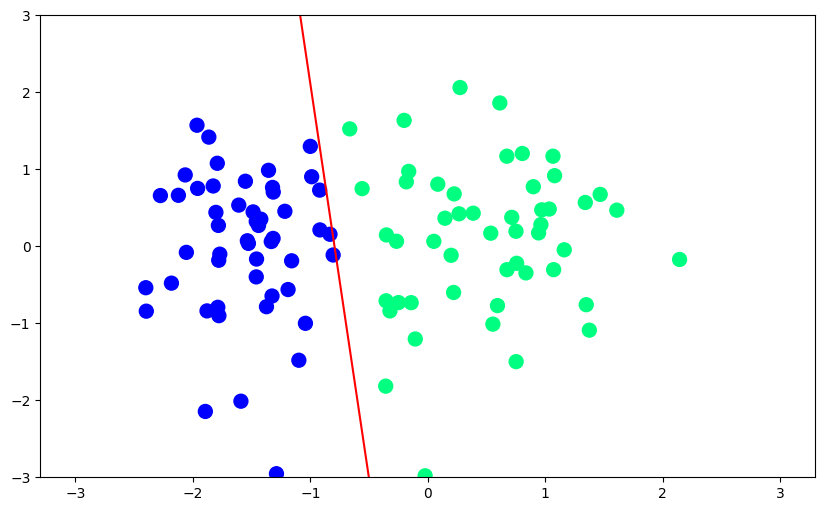

In [17]:
# Plot best fit line
m = -(coef_[0] / coef_[1])
c = -(intercept_ / coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.plot(x_input, y_input, color='red')
plt.ylim(-3, 3)

## Problem with Perceptron Trick

1. We cannot say that the line obtained is the best fit line for that particular dataset. There may exist other lines that are even better. In other words, we cannot quantify the results obtained using Perceptron Trick.
2. Sometimes, Perceptron model may not converge.

## Perceptron Trick: Conclusion

Perceptron Trick can be used as a hack, but in order to ensure that we get the best possible line and to quantify the results, we need to use Loss Functions.

# 6. Perceptron Loss Functions